### import section

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Neccessary Data

In [6]:
sect1 = pd.read_csv('cleaned_property_features.csv', index_col=0)
sect1.head()

,cat3_slug,city_slug,neighborhood_slug,Land,Improvements,has_parking,diff_age,has_warehouse,has_elevator,rooms_count,floor,log_Land
Unnamed: 0,,,,,,,,,,,,
0,villa,karaj,mehrshahr,500.0,200.0,-1.0,-1.0,1.0,-1.0,3.0,1.0,6.214608
1,apartment-sell,tehran,gholhak,60.0,0.0,1.0,14.0,1.0,1.0,1.0,3.0,4.094345
2,apartment-rent,tehran,tohid,132.0,0.0,1.0,31.0,1.0,1.0,3.0,3.0,4.882802
3,office-rent,tehran,elahiyeh,90.0,0.0,1.0,30.0,0.0,1.0,1.0,4.0,4.499810
4,apartment-sell,mashhad,emamreza,115.0,0.0,1.0,33.0,1.0,1.0,2.0,4.0,4.744932


In [8]:
sect1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919418 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cat3_slug          919418 non-null  object 
 1   city_slug          919418 non-null  object 
 2   neighborhood_slug  919418 non-null  object 
 3   Land               919418 non-null  float64
 4   Improvements       919418 non-null  float64
 5   has_parking        919418 non-null  float64
 6   diff_age           919418 non-null  float64
 7   has_warehouse      919418 non-null  float64
 8   has_elevator       919417 non-null  float64
 9   rooms_count        919418 non-null  float64
 10  floor              919418 non-null  float64
 11  log_Land           919418 non-null  float64
dtypes: float64(9), object(3)
memory usage: 91.2+ MB


In [10]:
sect1.Land.describe()

count    919418.000000
mean        147.680668
std         124.000308
min          17.500000
25%          75.000000
50%         106.000000
75%         173.000000
max         870.000000
Name: Land, dtype: float64

In [46]:
totalprice = pd.read_csv('../../processed data/total_price.csv', index_col=0) 
totalprice_log = pd.read_csv('../../processed data/total_price_log.csv', index_col=0)
totalprice_log.rename(columns={'total_price':'total_price_cleaned'},inplace=True)

In [36]:
totalprice_log.head()

,total_price
0,4.207317e+10
1,8.500000e+09
2,8.083333e+09
3,2.058333e+10
4,5.750000e+09


### merging all of sections

In [276]:
df = pd.concat([sect1,totalprice['total_price'],totalprice_log['total_price_cleaned']], axis=1)
df

,cat3_slug,city_slug,neighborhood_slug,Land,Improvements,has_parking,diff_age,has_warehouse,has_elevator,rooms_count,floor,log_Land,total_price,total_price_cleaned
0,villa,karaj,mehrshahr,500.0,200.0,-1.0,-1.0,1.0,-1.0,3.0,1.0,6.214608,1.162500e+10,4.207317e+10
1,apartment-sell,tehran,gholhak,60.0,0.0,1.0,14.0,1.0,1.0,1.0,3.0,4.094345,8.500000e+09,8.500000e+09
2,apartment-rent,tehran,tohid,132.0,0.0,1.0,31.0,1.0,1.0,3.0,3.0,4.882802,8.083333e+09,8.083333e+09
3,office-rent,tehran,elahiyeh,90.0,0.0,1.0,30.0,0.0,1.0,1.0,4.0,4.499810,1.162500e+10,2.058333e+10
4,apartment-sell,mashhad,emamreza,115.0,0.0,1.0,33.0,1.0,1.0,2.0,4.0,4.744932,5.750000e+09,5.750000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.700000e+09,8.700000e+09
999934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111110e+05,1.851933e+08
999938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.500000e+09,7.500000e+09
999964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.500000e+09,6.500000e+09


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999753 entries, 0 to 999985
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   cat3_slug            919418 non-null  object 
 1   city_slug            919418 non-null  object 
 2   neighborhood_slug    919418 non-null  object 
 3   Land                 919418 non-null  float64
 4   Improvements         919418 non-null  float64
 5   has_parking          919418 non-null  float64
 6   diff_age             919418 non-null  float64
 7   has_warehouse        919418 non-null  float64
 8   has_elevator         919417 non-null  float64
 9   rooms_count          919418 non-null  float64
 10  floor                919418 non-null  float64
 11  log_Land             919418 non-null  float64
 12  total_price          936712 non-null  float64
 13  total_price_cleaned  936712 non-null  float64
dtypes: float64(11), object(3)
memory usage: 114.4+ MB


#### cat3_slug & city_slug & neighborhood_slug  

با توجه به آبجکت بودن این ستون ها ما نیاز داریم برای آموزش آنها به اعداد انکود کنیم 

In [278]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

le = LabelEncoder()
df['city_slug'] = le.fit_transform(df['city_slug'].astype(str))
df['cat3_slug'] = le.fit_transform(df['cat3_slug'].astype(str))
df['neighborhood_slug'] = le.fit_transform(df['neighborhood_slug'].astype(str))

# scaler = StandardScaler()
# cols_to_scale = ["city_slug", "cat3_slug", "neighborhood_slug"] 
# df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [232]:
df.head()

,cat3_slug,city_slug,neighborhood_slug,Land,Improvements,has_parking,diff_age,has_warehouse,has_elevator,rooms_count,floor,log_Land,total_price,total_price_cleaned
0,14,181,669,500.0,200.0,-1.0,-1.0,1.0,-1.0,3.0,1.0,6.214608,1.162500e+10,4.207317e+10
1,1,397,363,60.0,0.0,1.0,14.0,1.0,1.0,1.0,3.0,4.094345,8.500000e+09,8.500000e+09
2,0,397,1120,132.0,0.0,1.0,31.0,1.0,1.0,3.0,3.0,4.882802,8.083333e+09,8.083333e+09
3,7,397,274,90.0,0.0,1.0,30.0,0.0,1.0,1.0,4.0,4.499810,1.162500e+10,2.058333e+10
4,1,251,283,115.0,0.0,1.0,33.0,1.0,1.0,2.0,4.0,4.744932,5.750000e+09,5.750000e+09


#### fill nans in total_price

از آن جایی که مقادیر در آموزش رگرسیون با توجه به مدلی که انتخاب کردیم باید مقادیر توتال پرایس نا موجود را پر کنیم که این کار از طریق کد زیر بدست میایید <br>
ابتدا داده ها را براساس فیلد شهر و کتگوری دسته بندی میکنیم . میانگین توتال پرایس رو برای اون دسته محاسبه میکنیم و مقادیر نا موجود هر دسته را با آن پر میکنیم 

In [280]:
def fill_total_price_by_group(df):
    
    df = df.copy()
    df["total_price"] = df.groupby(["cat3_slug", "city_slug",'neighborhood_slug'])["total_price"]\
                          .transform(lambda x: x.fillna(x.mean()))
    df["total_price_cleaned"] = df.groupby(["cat3_slug", "city_slug",'neighborhood_slug'])["total_price_cleaned"]\
                          .transform(lambda x: x.fillna(x.mean()))
    return df

In [282]:
df = fill_total_price_by_group(df)

برای نرمالایز کردن رنج ستون ها از مقادیر توتال پرایس لگاریتم بر پایه میلیون میگیریم 

In [284]:
df['total_price'] = df["total_price"] / 1e6
df['total_price_cleaned'] = df["total_price_cleaned"] / 1e6
#df["total_price_log"] = np.log(df["total_price"]) / np.log(1e6)   ## اسکیل کردن ستون قیمت کل جون رنجش خیلی متفاوت از بقیه ستون هاست 

In [240]:
df['total_price'].describe()

count    995817.000000
mean       3993.780380
std        3430.759377
min           0.000001
25%        1480.000000
50%        2800.000000
75%        5400.000000
max       11625.000000
Name: total_price, dtype: float64

In [242]:
df['total_price_cleaned'].describe()

count    995817.000000
mean       5271.760521
std        7395.048552
min         185.193250
25%        1490.000000
50%        2800.000000
75%        5950.000000
max       42073.167636
Name: total_price_cleaned, dtype: float64

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999753 entries, 0 to 999985
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   cat3_slug            999753 non-null  int64  
 1   city_slug            999753 non-null  int64  
 2   neighborhood_slug    999753 non-null  int64  
 3   Land                 919418 non-null  float64
 4   Improvements         919418 non-null  float64
 5   has_parking          919418 non-null  float64
 6   diff_age             919418 non-null  float64
 7   has_warehouse        919418 non-null  float64
 8   has_elevator         919417 non-null  float64
 9   rooms_count          919418 non-null  float64
 10  floor                919418 non-null  float64
 11  log_Land             919418 non-null  float64
 12  total_price          995817 non-null  float64
 13  total_price_cleaned  995817 non-null  float64
dtypes: float64(11), int64(3)
memory usage: 114.4 MB


### Calculating Unit_price for Prediction !!!

این پارامتر میشود تارگت برای رگرسون 

In [286]:
df['unit_price'] = df['total_price'] / df['Land']
df['unit_log'] = np.log(df['unit_price'])
df['log_land'] = np.log(df.Land)

In [288]:
df['unit_price_clean'] = df['total_price_cleaned'] / df['Land']
df['unit_log_clean'] = np.log(df['unit_price_clean'])

In [290]:
df['log_cl_price'] = (np.log(df["total_price_cleaned"]) / np.log(1e6)) / df['Land']

In [292]:
df['Improvements_log'] = np.log(df.Land)

In [294]:
df['unit_log'].describe()

count    915482.000000
mean          3.015253
std           1.702440
min         -20.500122
25%           2.621039
50%           3.288719
75%           3.851398
max           6.470541
Name: unit_log, dtype: float64

In [76]:
df['Land'].describe()

count    919418.000000
mean        147.680668
std         124.000308
min          17.500000
25%          75.000000
50%         106.000000
75%         173.000000
max         870.000000
Name: Land, dtype: float64

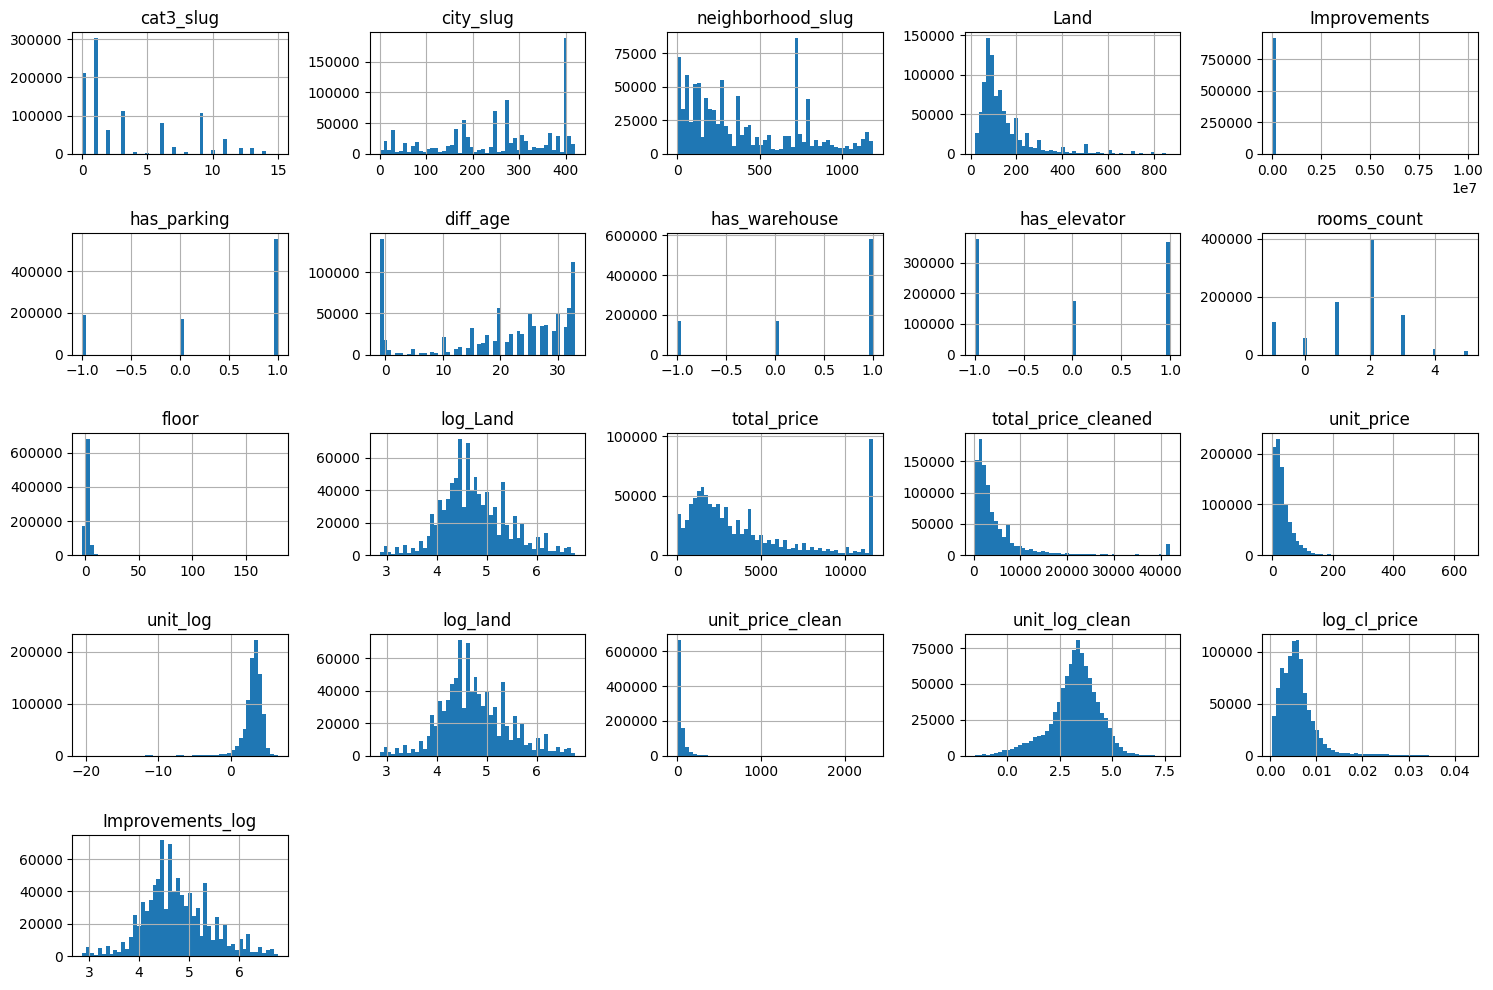

In [296]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

# رسم هیستوگرام برای هر ستون عددی
df[numeric_cols].hist(bins=50, figsize=(15, 10))
plt.tight_layout()
plt.show()


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999753 entries, 0 to 999985
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   cat3_slug            999753 non-null  float64
 1   city_slug            999753 non-null  float64
 2   neighborhood_slug    999753 non-null  float64
 3   Land                 919418 non-null  float64
 4   Improvements         919418 non-null  float64
 5   has_parking          919418 non-null  float64
 6   diff_age             919418 non-null  float64
 7   has_warehouse        919418 non-null  float64
 8   has_elevator         919417 non-null  float64
 9   rooms_count          919418 non-null  float64
 10  floor                919418 non-null  float64
 11  log_Land             919418 non-null  float64
 12  total_price          995817 non-null  float64
 13  total_price_cleaned  995817 non-null  float64
 14  unit_price           915482 non-null  float64
 15  unit_log             9

### Creating model for estimate unit_price

#### Random forest

In [298]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

#### Data preperation

حذف کردن سطر هایی که مقدار قیمت واحد برای آنها وجود ندارد 

In [300]:
df = df.drop(['total_price_cleaned','total_price',],axis=1)

In [302]:
df = df[~df['unit_price'].isna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 915482 entries, 0 to 999999
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cat3_slug          915482 non-null  int64  
 1   city_slug          915482 non-null  int64  
 2   neighborhood_slug  915482 non-null  int64  
 3   Land               915482 non-null  float64
 4   Improvements       915482 non-null  float64
 5   has_parking        915482 non-null  float64
 6   diff_age           915482 non-null  float64
 7   has_warehouse      915482 non-null  float64
 8   has_elevator       915481 non-null  float64
 9   rooms_count        915482 non-null  float64
 10  floor              915482 non-null  float64
 11  log_Land           915482 non-null  float64
 12  unit_price         915482 non-null  float64
 13  unit_log           915482 non-null  float64
 14  log_land           915482 non-null  float64
 15  unit_price_clean   915482 non-null  float64
 16  unit_lo

In [304]:
X = df.drop(['unit_price','unit_log','unit_price_clean','unit_log_clean','log_Land','Land','log_cl_price'],axis=1)
y = df['log_cl_price']

In [306]:
X.head()

,cat3_slug,city_slug,neighborhood_slug,Improvements,has_parking,diff_age,has_warehouse,has_elevator,rooms_count,floor,log_land,Improvements_log
0,14,181,669,200.0,-1.0,-1.0,1.0,-1.0,3.0,1.0,6.214608,6.214608
1,1,397,363,0.0,1.0,14.0,1.0,1.0,1.0,3.0,4.094345,4.094345
2,0,397,1120,0.0,1.0,31.0,1.0,1.0,3.0,3.0,4.882802,4.882802
3,7,397,274,0.0,1.0,30.0,0.0,1.0,1.0,4.0,4.499810,4.499810
4,1,251,283,0.0,1.0,33.0,1.0,1.0,2.0,4.0,4.744932,4.744932


In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [310]:
rf_model = RandomForestRegressor(
    n_estimators=25,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [312]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score:", r2)
print("MAE:", mae)
print("MSE:", mse)

R2 Score: 0.967265157708065
MAE: 0.00035286518279817834
MSE: 5.551115068482149e-07


In [314]:
scores = cross_val_score(rf_model, X_test, y_test, cv=5, scoring='r2')
print(scores)

[0.96565754 0.96542589 0.96470099 0.96537179 0.96621544]


#### convert unit_log_1 to total_price

In [322]:
import numpy as np

# df['log_cl_price'] = (np.log(df["total_price_cleaned"]) / np.log(1e6)) / df['Land']
df["reconstructed_total_price"] = np.exp(df["log_cl_price"] * df["Land"] * np.log(1e6))


In [326]:
df["reconstructed_total_price"].describe()

count    915482.000000
mean       5086.039529
std        7081.288066
min         185.193250
25%        1500.000000
50%        2750.000000
75%        5500.000000
max       42073.167636
Name: reconstructed_total_price, dtype: float64

In [304]:
df_0["total_price"].describe()

count    942576.000000
mean       3899.009001
std        3321.544618
min           0.000001
25%        1500.000000
50%        2800.000000
75%        5016.666667
max       11625.000000
Name: total_price, dtype: float64

### simple regression

In [334]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

lin_reg = LinearRegression()

# Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores, rmse_scores = [], []

for train_index, test_index in kf.split(X_imputed):
    X_train, X_test = X_imputed[train_index], X_imputed[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    lin_reg.fit(X_train, y_train)
    y_pred = lin_reg.predict(X_test)

    r2_scores.append(r2_score(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

print("Mean R²:", np.mean(r2_scores))
print("Mean RMSE:", np.mean(rmse_scores))


Mean R²: 0.7942878331374004
Mean RMSE: 0.0018595506988257453


#### DecisionTreeRegressor

In [316]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


dt_model = DecisionTreeRegressor(
    max_depth=25,        
    min_samples_split=2,   # حداقل تعداد نمونه برای split
    min_samples_leaf=10,    # حداقل تعداد نمونه در leaf
    random_state=42
)


dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)


r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score:", r2)
print("MAE:", mae)
print("MSE:", mse)

R2 Score: 0.965560731840964
MAE: 0.0003775512556225832
MSE: 5.840148509657633e-07


In [318]:
y_train_pred = dt_model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("Train R2:", r2_train)

Train R2: 0.9771235347941768
